In [1]:
import os
import pickle
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
os.chdir('/Volumes/TOSHIBA EXT/wirthlab PC Backup/071521_John Inverted Testing/071521_images/batch 2/')
#this was the first batch of images I took. Located on the turquoise ML backup drive. 4 dispersion times, 7 images per.

os.chdir('01') #folder containing seven images taken of paste at dispersion time 1 minute

image = Image.open('071521_image_0.tif')
width, height = image.size
numPixels = width*height
    
numZeroes = 0    
    
def getAverageBrightness(N): #this fn looks for images contained in the cwd, and finds the average 8bit grayscale value per pixel (assuming the image is black and white)
    imgNum = 0  
    average_brightness_arr = []
    
    while imgNum < N:
        imageGrayScaleSum=0.0
        image = Image.open('071521_image_' + str(imgNum) + '.tif')
        i=0
        while i < width:
            j=0
            while j < height:
                pixel = image.getpixel((i,j))
                imageGrayScaleSum+=pixel[1]
                j+=1
            i+=1 
        average_brightness_arr.append((imageGrayScaleSum/numPixels))
        imgNum+=1
    return average_brightness_arr
    
average_brightness_01 = getAverageBrightness(7)

print(average_brightness_01)

[184.88544921875, 185.62717208862304, 186.17128372192383, 185.93770370483398, 186.46111984252929, 184.78125610351563, 184.82225646972657]


In [3]:
os.chdir(os.path.normpath(os.getcwd() + os.sep + os.pardir)) #command to go back a directory
os.chdir('03') #folder containing seven images taken of paste at dispersion time 3 minutes

average_brightness_03 = getAverageBrightness(7)

print(average_brightness_03)

[187.92154922485352, 187.0570861816406, 187.55879592895508, 187.79489440917968, 186.7566360473633, 185.91422958374022, 184.41840209960938]


In [4]:
os.chdir(os.path.normpath(os.getcwd() + os.sep + os.pardir))
os.chdir('08') #folder containing seven images taken of paste at dispersion time 8 minutes

average_brightness_08 = getAverageBrightness(7)

print(average_brightness_08)

[188.12891998291016, 188.4167167663574, 187.14433822631835, 188.17069320678712, 187.3791618347168, 187.02800216674805, 186.3671676635742]


In [5]:
os.chdir(os.path.normpath(os.getcwd() + os.sep + os.pardir))
os.chdir('15') #folder containing seven images taken of paste at dispersion time 15 minutes

average_brightness_15 = getAverageBrightness(7)

print(average_brightness_15)

[188.26298904418945, 189.69166412353516, 188.64395980834962, 188.96307067871095, 188.2059768676758, 187.48338088989257, 189.57924194335936]


In [7]:
# os.chdir(os.path.normpath(os.getcwd() + os.sep + os.pardir)) #going back to the batch 2 directory
# os.mkdir('pickle dump')
# print(os.getcwd())

# pickle.dump(average_brightness_01, open( "save_01.p", "wb" ))
# pickle.dump(average_brightness_03, open( "save_03.p", "wb" ))
# pickle.dump(average_brightness_08, open( "save_08.p", "wb" ))
# pickle.dump(average_brightness_15, open( "save_15.p", "wb" ))

In [8]:
# un pickling

# average_brightness_01 = pickle.load(open( "save_01.p", "rb" ))
# average_brightness_03 = pickle.load(open( "save_03.p", "rb" ))
# average_brightness_08 = pickle.load(open( "save_08.p", "rb" ))
# average_brightness_15 = pickle.load(open( "save_15.p", "rb" ))

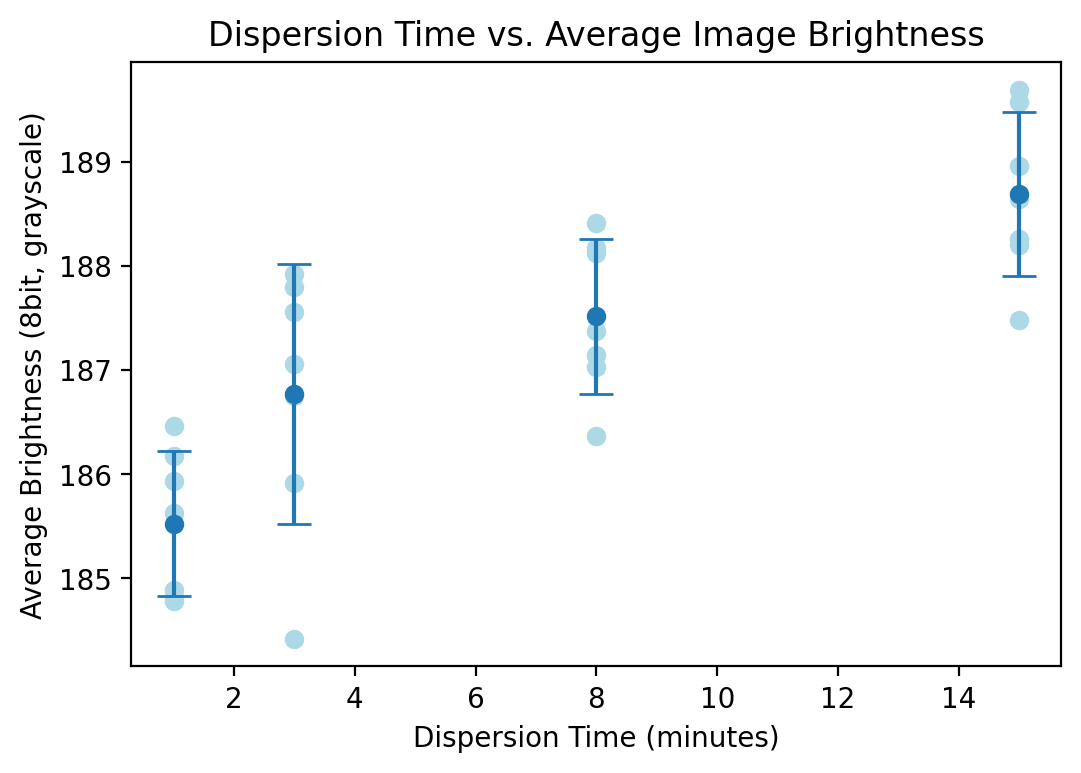

In [11]:
x = []
N = len(average_brightness_01)
dispersion_times = [1,3,8,15]

for dispersion_time in dispersion_times: 
    # this loop uses dispersion_times, N, and x to make a list containing the appropriate number of dispersion time figures from the data lists
    # I should have just put everything in a dictionary instead but this is prototyping code so I'm gonna leave it for now
    i = 0
    while i < N:
        x.append(dispersion_time)
        i+=1

# this array contains all of the average brightness values per image        
y = average_brightness_01 + average_brightness_03 + average_brightness_08 + average_brightness_15

plt.figure(dpi = 200.0) # setting dpi to make a larger image (doubled)

plt.scatter(x, y, c='lightblue')

# this variable, y_avg is an array containing four values, the average across all of the images in each dispersion_time category
y_avg = []
y_avg.append(sum(average_brightness_01)/len(average_brightness_01))
y_avg.append(sum(average_brightness_03)/len(average_brightness_03))
y_avg.append(sum(average_brightness_08)/len(average_brightness_08))
y_avg.append(sum(average_brightness_15)/len(average_brightness_15))

plt.scatter(dispersion_times, y_avg)

standard_deviations = [0.69890117270528, 1.2478971214023, 0.74501946319159, 0.78986454107011]

plt.errorbar(x = dispersion_times, y = y_avg, yerr = standard_deviations, fmt = 'none', capsize = 6)

plt.xlabel('Dispersion Time (minutes)')
plt.ylabel('Average Brightness (8bit, grayscale)')
plt.title('Dispersion Time vs. Average Image Brightness')

plt.show()

36.36250795636858
